In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

# -------------------------------
# Load datasets
# -------------------------------
fear_greed_path = "/home/amitdubey/Downloads/fear_greed_index.csv"
trader_path = "/home/amitdubey/Downloads/historical_data.csv"

df_fg = pd.read_csv(fear_greed_path)
df_his = pd.read_csv(trader_path)

print("Fear/Greed dataset shape:", df_fg.shape)
print("Trader dataset shape:", df_his.shape)

display(df_fg.head())
display(df_his.head())


Fear/Greed dataset shape: (2644, 4)
Trader dataset shape: (211224, 16)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
# -------------------------------
# Basic checks
# -------------------------------
print("Fear/Greed Missing Values:\n", df_fg.isnull().sum())
print("\nTrader Missing Values:\n", df_his.isnull().sum())

print("\nFear/Greed duplicates:", df_fg.duplicated().sum())
print("Trader duplicates:", df_his.duplicated().sum())


Fear/Greed Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Trader Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Fear/Greed duplicates: 0
Trader duplicates: 0


In [6]:
# Fear/Greed data cleanup
df_fg.columns = [c.strip().lower() for c in df_fg.columns]

if "date" not in df_fg.columns:
    if "timestamp" in df_fg.columns:
        df_fg["date"] = pd.to_datetime(df_fg["timestamp"], unit="s", errors="coerce")
    else:
        raise Exception("No date or timestamp column found in Fear/Greed dataset")

# keep as datetime64[ns] and normalize to date-level
df_fg["date"] = pd.to_datetime(df_fg["date"], errors="coerce").dt.normalize()

# Trader dataset cleanup
df_his.columns = [c.strip().replace(" ", "_") for c in df_his.columns]

df_his["Timestamp_IST"] = pd.to_datetime(df_his["Timestamp_IST"], errors="coerce")
df_his["date"] = df_his["Timestamp_IST"].dt.normalize()

print("Trader date range:", df_his["date"].min(), "to", df_his["date"].max())
print("Fear/Greed date range:", df_fg["date"].min(), "to", df_fg["date"].max())
# ...existing code...

Trader date range: 2023-01-05 00:00:00 to 2025-12-04 00:00:00
Fear/Greed date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00


In [7]:
df_merge = df_his.merge(df_fg[["date", "value", "classification"]], on="date", how="left")

print("Merged dataset shape:", df_merge.shape)
display(df_merge.head())


Merged dataset shape: (211224, 19)


,Account,Coin,Execution_Price,Size_Tokens,Size_USD,Side,Timestamp_IST,Start_Position,Direction,Closed_PnL,Transaction_Hash,Order_ID,Crossed,Fee,Trade_ID,Timestamp,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,70.0,Greed


In [8]:
# Ensure numeric columns
df_merge["Closed_PnL"] = pd.to_numeric(df_merge["Closed_PnL"], errors="coerce")
df_merge["Size_USD"] = pd.to_numeric(df_merge["Size_USD"], errors="coerce")
df_merge["Fee"] = pd.to_numeric(df_merge["Fee"], errors="coerce")

# Leverage if exists
if "Leverage" in df_merge.columns:
    df_merge["Leverage"] = pd.to_numeric(df_merge["Leverage"], errors="coerce")
else:
    df_merge["Leverage"] = np.nan

# Fill missing sentiment classification
df_merge["classification"] = df_merge["classification"].fillna("Unknown")

# Win indicator
df_merge["is_win"] = (df_merge["Closed_PnL"] > 0).astype(int)

# Long/Short mapping
df_merge["position_type"] = df_merge["Side"].map({"BUY": "Long", "SELL": "Short"}).fillna("Unknown")

df_merge.head()


,Account,Coin,Execution_Price,Size_Tokens,Size_USD,Side,Timestamp_IST,Start_Position,Direction,Closed_PnL,Transaction_Hash,Order_ID,Crossed,Fee,Trade_ID,Timestamp,date,value,classification,Leverage,is_win,position_type
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,70.0,Greed,NaN,0,Long
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,70.0,Greed,NaN,0,Long
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,70.0,Greed,NaN,0,Long
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,70.0,Greed,NaN,0,Long
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,70.0,Greed,NaN,0,Long


In [9]:
daily_trader = df_merge.groupby(["date", "Account", "classification"]).agg(
    daily_pnl=("Closed_PnL", "sum"),
    trades=("Closed_PnL", "count"),
    win_rate=("is_win", "mean"),
    avg_trade_size=("Size_USD", "mean"),
    total_volume=("Size_USD", "sum"),
    avg_leverage=("Leverage", "mean")
).reset_index()

daily_trader.head()


,date,Account,classification,daily_pnl,trades,win_rate,avg_trade_size,total_volume,avg_leverage
0,2023-01-05,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Fear,0.000000,3,0.000000,159.000000,477.00,NaN
1,2023-05-12,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Neutral,0.000000,9,0.000000,5556.203333,50005.83,NaN
2,2024-01-01,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,-129.531460,18,0.055556,14679.973889,264239.53,NaN
3,2024-01-02,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,0.000000,6,0.000000,334.696667,2008.18,NaN
4,2024-01-03,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Greed,8244.241409,137,0.934307,3452.370073,472974.70,NaN


In [10]:
long_short = df_merge.pivot_table(
    index=["date", "Account", "classification"],
    columns="position_type",
    values="Closed_PnL",
    aggfunc="count",
    fill_value=0
).reset_index()

if "Long" not in long_short.columns:
    long_short["Long"] = 0
if "Short" not in long_short.columns:
    long_short["Short"] = 0

long_short["long_short_ratio"] = (long_short["Long"] + 1) / (long_short["Short"] + 1)

daily_trader = daily_trader.merge(
    long_short[["date", "Account", "classification", "long_short_ratio"]],
    on=["date", "Account", "classification"],
    how="left"
)

daily_trader.head()


,date,Account,classification,daily_pnl,trades,win_rate,avg_trade_size,total_volume,avg_leverage,long_short_ratio
0,2023-01-05,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Fear,0.000000,3,0.000000,159.000000,477.00,NaN,4.000000
1,2023-05-12,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Neutral,0.000000,9,0.000000,5556.203333,50005.83,NaN,2.666667
2,2024-01-01,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,-129.531460,18,0.055556,14679.973889,264239.53,NaN,1.222222
3,2024-01-02,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,0.000000,6,0.000000,334.696667,2008.18,NaN,7.000000
4,2024-01-03,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Greed,8244.241409,137,0.934307,3452.370073,472974.70,NaN,0.376238


In [11]:
daily_market = daily_trader.groupby(["date", "classification"]).agg(
    total_pnl=("daily_pnl", "sum"),
    avg_pnl=("daily_pnl", "mean"),
    median_pnl=("daily_pnl", "median"),
    avg_win_rate=("win_rate", "mean"),
    avg_trades=("trades", "mean"),
    avg_trade_size=("avg_trade_size", "mean"),
    avg_leverage=("avg_leverage", "mean"),
    avg_long_short_ratio=("long_short_ratio", "mean")
).reset_index()

daily_market.head()


,date,classification,total_pnl,avg_pnl,median_pnl,avg_win_rate,avg_trades,avg_trade_size,avg_leverage,avg_long_short_ratio
0,2023-01-05,Fear,0.000000,0.000000,0.000000,0.000000,3.0,159.000000,NaN,4.000000
1,2023-05-12,Neutral,0.000000,0.000000,0.000000,0.000000,9.0,5556.203333,NaN,2.666667
2,2024-01-01,Greed,-129.531460,-129.531460,-129.531460,0.055556,18.0,14679.973889,NaN,1.222222
3,2024-01-02,Greed,0.000000,0.000000,0.000000,0.000000,6.0,334.696667,NaN,7.000000
4,2024-01-03,Greed,8244.241409,8244.241409,8244.241409,0.934307,137.0,3452.370073,NaN,0.376238


ANALYSIS

In [12]:
fear_greed_summary = daily_market.groupby("classification").agg(
    days=("date", "count"),
    total_pnl=("total_pnl", "sum"),
    avg_daily_pnl=("total_pnl", "mean"),
    avg_win_rate=("avg_win_rate", "mean"),
    avg_trades=("avg_trades", "mean"),
    avg_trade_size=("avg_trade_size", "mean"),
    avg_leverage=("avg_leverage", "mean"),
    avg_long_short_ratio=("avg_long_short_ratio", "mean")
).reset_index()

fear_greed_summary.sort_values("avg_daily_pnl", ascending=False)


,classification,days,total_pnl,avg_daily_pnl,avg_win_rate,avg_trades,avg_trade_size,avg_leverage,avg_long_short_ratio
5,Unknown,30,2.054157e+06,68471.885438,0.367976,109.057458,6788.604873,NaN,6.291703
2,Fear,37,1.779226e+06,48087.177910,0.326204,51.707899,7250.242794,NaN,5.777863
1,Extreme Greed,43,1.156894e+06,26904.504083,0.298233,32.433056,8315.733212,NaN,3.263601
3,Greed,56,6.096325e+05,10886.295226,0.328323,57.780184,6910.511707,NaN,3.960158
4,Neutral,16,7.465674e+04,4666.046374,0.256609,62.247869,7423.117367,NaN,3.920803
0,Extreme Fear,6,4.399937e+03,733.322758,0.258868,33.627996,3943.313916,NaN,5.150785


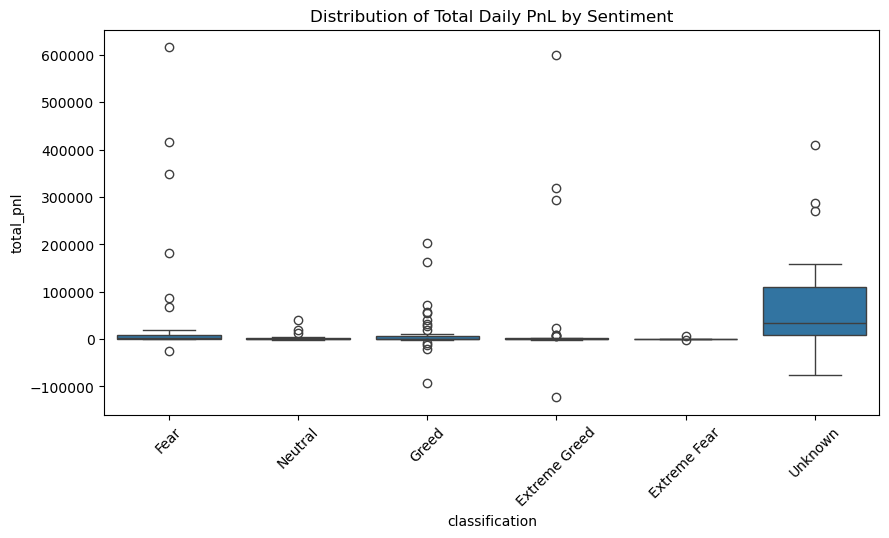

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data=daily_market, x="classification", y="total_pnl")
plt.xticks(rotation=45)
plt.title("Distribution of Total Daily PnL by Sentiment")
plt.show()


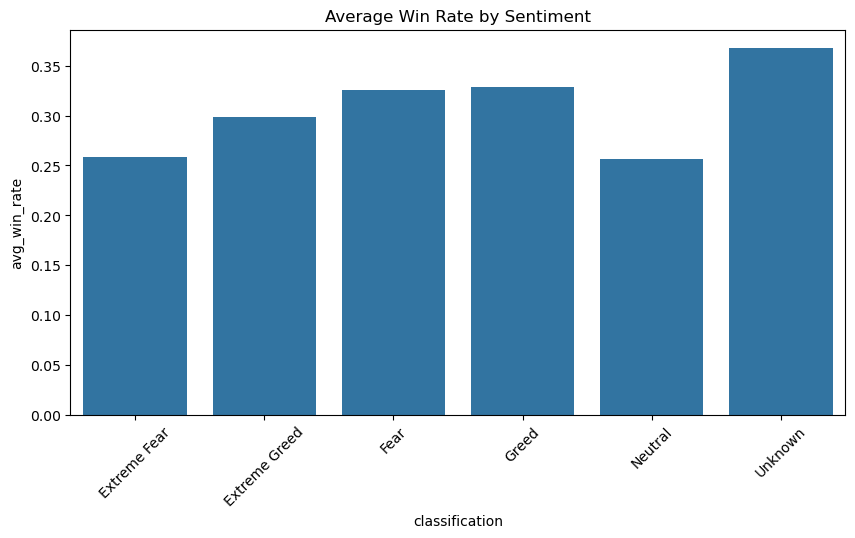

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(data=fear_greed_summary, x="classification", y="avg_win_rate")
plt.xticks(rotation=45)
plt.title("Average Win Rate by Sentiment")
plt.show()


In [17]:
behavior_summary = daily_trader.groupby("classification").agg(
    avg_trades=("trades", "mean"),
    avg_volume=("total_volume", "mean"),
    avg_trade_size=("avg_trade_size", "mean"),
    avg_leverage=("avg_leverage", "mean"),
    avg_long_short_ratio=("long_short_ratio", "mean")
).reset_index()

behavior_summary.sort_values("avg_trades", ascending=False)


,classification,avg_trades,avg_volume,avg_trade_size,avg_leverage,avg_long_short_ratio
5,Unknown,115.015915,759657.051804,7120.746138,NaN,6.325805
2,Fear,88.337580,507480.197834,7518.449558,NaN,11.331317
4,Neutral,74.486486,322690.573243,5763.624619,NaN,3.741731
0,Extreme Fear,70.484848,290310.304242,7641.104727,NaN,7.302819
3,Greed,59.120419,298669.192356,7029.606816,NaN,4.577407
1,Extreme Greed,50.187500,162712.145268,7027.976333,NaN,3.965970


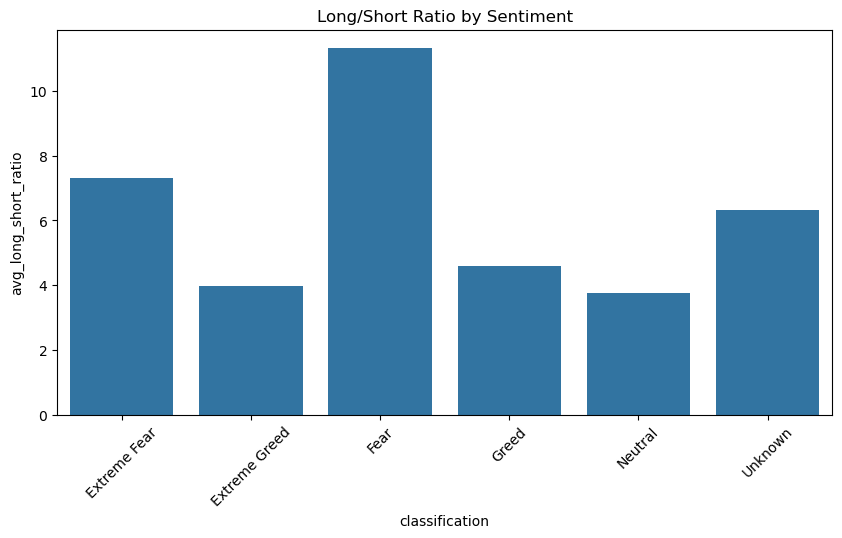

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=behavior_summary, x="classification", y="avg_long_short_ratio")
plt.xticks(rotation=45)
plt.title("Long/Short Ratio by Sentiment")
plt.show()

In [ ]:

avg_lev = trader_profile["avg_leverage"].fillna(0)
try:
    lev_bins = pd.qcut(avg_lev, q=2, labels=["Low Leverage", "High Leverage"], duplicates="drop")
    if lev_bins.nunique() < 2:
        raise ValueError("Not enough unique leverage values for qcut.")
    trader_profile["leverage_segment"] = lev_bins
except ValueError:
    median_lev = avg_lev.median()
    trader_profile["leverage_segment"] = np.where(avg_lev > median_lev, "High Leverage", "Low Leverage")

# frequency segment (safe)
trades = trader_profile["trades"]
try:
    freq_bins = pd.qcut(trades, q=2, labels=["Infrequent", "Frequent"], duplicates="drop")
    if freq_bins.nunique() < 2:
        raise ValueError("Not enough unique trade counts for qcut.")
    trader_profile["frequency_segment"] = freq_bins
except ValueError:
    median_trades = trades.median()
    trader_profile["frequency_segment"] = np.where(trades > median_trades, "Frequent", "Infrequent")

In [ ]:

# Build trader profile (per account)
trader_profile = daily_trader.groupby("Account").agg(
    total_pnl=("daily_pnl", "sum"),
    win_rate=("win_rate", "mean"),
    trades=("trades", "sum"),
    avg_trade_size=("avg_trade_size", "mean"),
    avg_leverage=("avg_leverage", "mean"),
).reset_index()

# Winner segment (safe)
try:
    winner_bins = pd.qcut(trader_profile["total_pnl"], q=2, labels=["Inconsistent", "Consistent"], duplicates="drop")
    if winner_bins.nunique() < 2:
        raise ValueError("Not enough unique pnl values for qcut.")
    trader_profile["winner_segment"] = winner_bins
except ValueError:
    median_pnl = trader_profile["total_pnl"].median()
    trader_profile["winner_segment"] = np.where(trader_profile["total_pnl"] > median_pnl, "Consistent", "Inconsistent")


In [25]:
print("========= INSIGHTS =========\n")

# Insight 1: Fear vs Greed PnL
fear_avg = fear_greed_summary[fear_greed_summary["classification"]=="Fear"]["avg_daily_pnl"].values
greed_avg = fear_greed_summary[fear_greed_summary["classification"]=="Greed"]["avg_daily_pnl"].values

if len(fear_avg)>0 and len(greed_avg)>0:
    print(f"1) Avg Daily PnL on Fear days:  {fear_avg[0]:.2f}")
    print(f"   Avg Daily PnL on Greed days: {greed_avg[0]:.2f}")
    if greed_avg[0] > fear_avg[0]:
        print("   → Traders perform better on Greed days.\n")
    else:
        print("   → Traders perform better on Fear days.\n")

# Insight 2: Leverage
fear_lev = fear_greed_summary[fear_greed_summary["classification"]=="Fear"]["avg_leverage"].values
greed_lev = fear_greed_summary[fear_greed_summary["classification"]=="Greed"]["avg_leverage"].values

if len(fear_lev)>0 and len(greed_lev)>0:
    print(f"2) Avg Leverage on Fear days:  {fear_lev[0]:.2f}")
    print(f"   Avg Leverage on Greed days: {greed_lev[0]:.2f}")
    if greed_lev[0] > fear_lev[0]:
        print("   → Traders use higher leverage during Greed.\n")
    else:
        print("   → Traders use higher leverage during Fear.\n")

# Insight 3: Trade frequency
fear_trades = fear_greed_summary[fear_greed_summary["classification"]=="Fear"]["avg_trades"].values
greed_trades = fear_greed_summary[fear_greed_summary["classification"]=="Greed"]["avg_trades"].values

if len(fear_trades)>0 and len(greed_trades)>0:
    print(f"3) Avg Trades on Fear days:  {fear_trades[0]:.2f}")
    print(f"   Avg Trades on Greed days: {greed_trades[0]:.2f}")
    if greed_trades[0] > fear_trades[0]:
        print("   → Traders trade more frequently during Greed.\n")
    else:
        print("   → Traders trade more frequently during Fear.\n")


========= INSIGHTS =========

1) Avg Daily PnL on Fear days:  48087.18
   Avg Daily PnL on Greed days: 10886.30
   → Traders perform better on Fear days.

2) Avg Leverage on Fear days:  nan
   Avg Leverage on Greed days: nan
   → Traders use higher leverage during Fear.

3) Avg Trades on Fear days:  51.71
   Avg Trades on Greed days: 57.78
   → Traders trade more frequently during Greed.

